In [2]:
import pandas as pd
train_df = pd.read_csv('./historical_tweet_data.csv')
train_df.head()


,tweet_id,timestamp,tweet_text,all_hashtags,user_id,username,user_profile_description,followers_count
0,1330119004904624128,2020-11-21 12:00:57,Do you know a publisher? We are trying to find...,"['endofyeargoals', 'donatelife', 'transplant',...",1258065197324959744,TxUnwrapped,Nonprofit for Intestinal and Multivisceral Tra...,16
1,1330118750457257987,2020-11-21 11:59:57,GET YOUR HOLIDAY SPIRIT ON WHATEVER YOURS LOOK...,['donatelife'],587502947,roxannewatson74,"Heart Transplant Recipient signing over 11,000...",1803
2,1330098472566009856,2020-11-21 10:39:22,My beautiful daughter’s life was waning in Jul...,"['DonateLife', 'ThankYouDay2020']",2877754405,sjholyoak,Participant Observer,18
3,1330073620236918790,2020-11-21 09:00:37,Don't forget tomorrow is DonateLife Thank You ...,"['DonateLife', 'Thankyouday2020']",37796974,DonateLifeToday,Register today — it only takes a minute! Talk ...,6465
4,1330066217906925568,2020-11-21 08:31:12,Australia's first intestinal transplant recipi...,"['DonateLife', 'ThankYouDay2020']",37796974,DonateLifeToday,Register today — it only takes a minute! Talk ...,6465


In [69]:
df_tweets = train_df['tweet_text']
df_tweets.head()

0    Do you know a publisher? We are trying to find...
1    GET YOUR HOLIDAY SPIRIT ON WHATEVER YOURS LOOK...
2    My beautiful daughter’s life was waning in Jul...
3    Don't forget tomorrow is DonateLife Thank You ...
4    Australia's first intestinal transplant recipi...
Name: tweet_text, dtype: object

### data pre processing

In [4]:
!pip install -U gensim

Requirement already up-to-date: gensim in /Users/pawanjeetkaur/opt/anaconda3/lib/python3.8/site-packages (3.8.3)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import re
import math
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pawanjeetkaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pawanjeetkaur/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [70]:
from nltk.corpus import stopwords
en_stop_words = set(stopwords.words('english'))
list(en_stop_words)[:10]

['on', 'most', 'until', 's', 'a', 'didn', 'himself', 'the', 'of', 'when']

In [207]:
train_clean=train_df.copy()

In [208]:
train_clean.head(2)

,tweet_id,timestamp,tweet_text,all_hashtags,user_id,username,user_profile_description,followers_count
0,1330119004904624128,2020-11-21 12:00:57,Do you know a publisher? We are trying to find...,"['endofyeargoals', 'donatelife', 'transplant',...",1258065197324959744,TxUnwrapped,Nonprofit for Intestinal and Multivisceral Tra...,16
1,1330118750457257987,2020-11-21 11:59:57,GET YOUR HOLIDAY SPIRIT ON WHATEVER YOURS LOOK...,['donatelife'],587502947,roxannewatson74,"Heart Transplant Recipient signing over 11,000...",1803


In [209]:
train_clean.dropna(inplace=True)

In [210]:
en_stop_words = set(stopwords.words('english'))
extended_stop_words = en_stop_words | \
                        {
                            '&amp;', 'rt',                           
                            'th','co', 're', 've', 'kim', 'daca'
                        }

In [219]:
# Remove HTML

clean=[]
for i in train_clean['tweet_text']:
    x=(re.sub(r"http\S+", "", i))
    y=(re.sub(r"@[\w]*","",x))
    clean.append(re.sub(r"#[\w]*","",y))

In [220]:
train_clean['trial']=clean

In [224]:
train_clean['trial']=train_clean['trial'].apply(lambda row: ' '.join([word for word in row.split() if (not word in en_stop_words)]))

In [227]:
train_clean['trial']=train_clean['trial'].str.lower()

In [229]:
train_clean['trial']=train_clean['trial'].str.replace("[^a-z0-9#]", " ")

In [231]:
train_clean['trial'] = train_clean['trial'].apply(lambda x: x.split())

In [232]:
train_clean.head(2)

,tweet_id,timestamp,tweet_text,all_hashtags,user_id,username,user_profile_description,followers_count,trial
0,1330119004904624128,2020-11-21 12:00:57,Do you know a publisher? We are trying to find...,"['endofyeargoals', 'donatelife', 'transplant',...",1258065197324959744,TxUnwrapped,Nonprofit for Intestinal and Multivisceral Tra...,16,"[do, know, publisher, we, trying, find, best, ..."
1,1330118750457257987,2020-11-21 11:59:57,GET YOUR HOLIDAY SPIRIT ON WHATEVER YOURS LOOK...,['donatelife'],587502947,roxannewatson74,"Heart Transplant Recipient signing over 11,000...",1803,"[get, your, holiday, spirit, on, whatever, you..."


In [168]:
df_clean_tweets.head()

,tweet_id,timestamp,tweet_text,all_hashtags,user_id,username,user_profile_description,followers_count,preprocessed_tweet_text
0,1330119004904624128,2020-11-21 12:00:57,Do you know a publisher? We are trying to find...,"['endofyeargoals', 'donatelife', 'transplant',...",1258065197324959744,TxUnwrapped,Nonprofit for Intestinal and Multivisceral Tra...,16,o you know a publisher e are trying to find...
1,1330118750457257987,2020-11-21 11:59:57,GET YOUR HOLIDAY SPIRIT ON WHATEVER YOURS LOOK...,['donatelife'],587502947,roxannewatson74,"Heart Transplant Recipient signing over 11,000...",1803,...
2,1330098472566009856,2020-11-21 10:39:22,My beautiful daughter’s life was waning in Jul...,"['DonateLife', 'ThankYouDay2020']",2877754405,sjholyoak,Participant Observer,18,y beautiful daughter s life was waning in ul...
3,1330073620236918790,2020-11-21 09:00:37,Don't forget tomorrow is DonateLife Thank You ...,"['DonateLife', 'Thankyouday2020']",37796974,DonateLifeToday,Register today — it only takes a minute! Talk ...,6465,on t forget tomorrow is onate ife hank ou ...
4,1330066217906925568,2020-11-21 08:31:12,Australia's first intestinal transplant recipi...,"['DonateLife', 'ThankYouDay2020']",37796974,DonateLifeToday,Register today — it only takes a minute! Talk ...,6465,ustralia s first intestinal transplant recipi...


In [165]:
df_clean_tweets['preprocessed_tweet_text'][10]

' from  unosnews    lease help keep immunosuppressed recipients  and others  safe by wearing a mask          hanks for the reminder  donatelifenewengland   lifecentercincy     https   t co 2  2    0 '

##### Topic modelling (just checking)

In [233]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([ word for tweet in train_clean.trial for word in tweet],10)

[('organ', 92),
 ('gt', 80),
 ('donor', 79),
 ('amp', 75),
 ('life', 72),
 ('transplant', 68),
 ('donation', 58),
 ('register', 45),
 ('tissue', 39),
 ('story', 38)]

In [236]:
tweets_dictionary = Dictionary(train_clean.trial)

In [237]:
tweets_corpus = [tweets_dictionary.doc2bow(tweet) for tweet in train_clean.trial]

In [238]:
#compute coherence
tweets_coherence = []

for nb_topics in range(1,36):
    lda = LdaModel(tweets_corpus, num_topics = nb_topics, id2word = tweets_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_corpus, dictionary=tweets_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

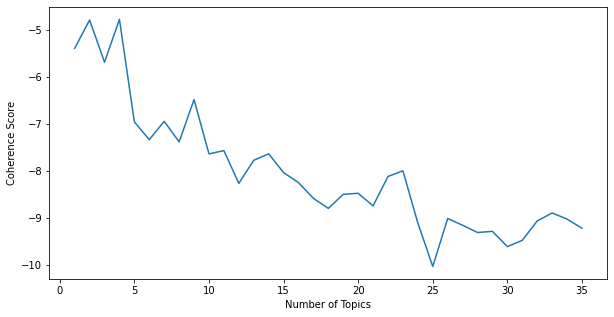

In [239]:
import matplotlib.pyplot as plt

######### visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,36),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [243]:
k = 10
tweets_lda = LdaModel(tweets_corpus, num_topics = k, id2word = tweets_dictionary, passes=10)

In [261]:
x=tweets_lda.show_topics(num_topics=k, num_words=5,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
list_of_words = []
for topic,words in topics_words:
    list_of_words.extend(words)
    #print(" ".join(words))

print(list_of_words)

0::['amp', 'life', 'save', 'another', 'you']
1::['donor', 'organ', 'donors', 'amp', 'life']
2::['gt', 'the', 'story', 'please', 'get']
3::['organ', 'us', 's', 'donation', 'join']
4::['help', 'please', 'important', 'register', 'need']
5::['s', 'amp', 'life', 'register', 'it']
6::['faith', 'learn', 'organ', 'donation', 'rose']
7::['donation', 'donor', 'organ', 'amp', 's']
8::['donor', 'transplant', 'organ', 'today', 's']
9::['organ', 'donation', 's', 'life', 'x']

['amp', 'life', 'save', 'another', 'you', 'donor', 'organ', 'donors', 'amp', 'life', 'gt', 'the', 'story', 'please', 'get', 'organ', 'us', 's', 'donation', 'join', 'help', 'please', 'important', 'register', 'need', 's', 'amp', 'life', 'register', 'it', 'faith', 'learn', 'organ', 'donation', 'rose', 'donation', 'donor', 'organ', 'amp', 's', 'donor', 'transplant', 'organ', 'today', 's', 'organ', 'donation', 's', 'life', 'x']


In [244]:
import matplotlib.gridspec as gridspec
#matplotlib.gridspec.GridSpecBase

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

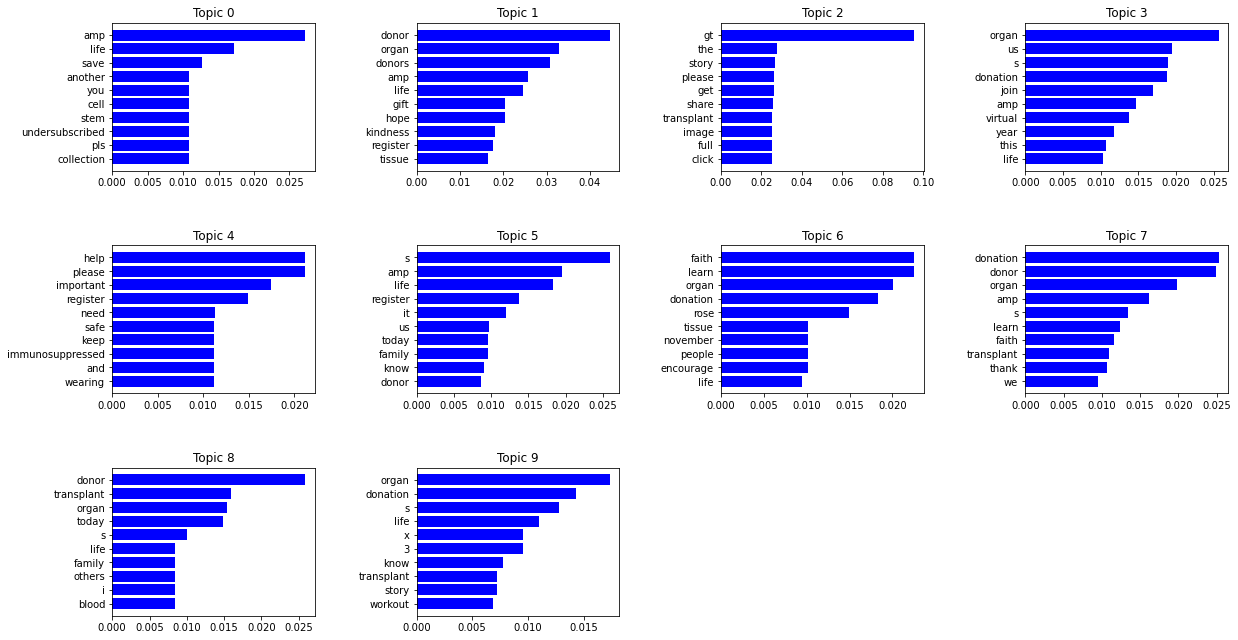

In [245]:
plot_top_words()

#### Changing dataset to binary class , Putting all the 300 tweets as class 1 and getting random tweets and putting it as 0 class to build logit model

In [257]:
import pandas as pd
final_data = pd.DataFrame(train_clean['trial'])
final_data['new_tweet'] = train_clean['trial'].apply(lambda x: ' '.join(x))

In [259]:
final_data.head()

,trial,new_tweet
0,"[do, know, publisher, we, trying, find, best, ...",do know publisher we trying find best economic...
1,"[get, your, holiday, spirit, on, whatever, you...",get your holiday spirit on whatever yours look...
2,"[my, beautiful, daughter, s, life, waning, jul...",my beautiful daughter s life waning july year ...
3,"[don, t, forget, tomorrow, donatelife, thank, ...",don t forget tomorrow donatelife thank you day...
4,"[australia, s, first, intestinal, transplant, ...",australia s first intestinal transplant recipi...


In [262]:
data = final_data.copy()

#### Label data

In [263]:
data['label'] = data['new_tweet'].map(lambda x: 1 if (any(word in x for word in list_of_words)) else 0)

In [264]:
data.head()

,trial,new_tweet,label
0,"[do, know, publisher, we, trying, find, best, ...",do know publisher we trying find best economic...,1
1,"[get, your, holiday, spirit, on, whatever, you...",get your holiday spirit on whatever yours look...,1
2,"[my, beautiful, daughter, s, life, waning, jul...",my beautiful daughter s life waning july year ...,1
3,"[don, t, forget, tomorrow, donatelife, thank, ...",don t forget tomorrow donatelife thank you day...,1
4,"[australia, s, first, intestinal, transplant, ...",australia s first intestinal transplant recipi...,1


In [266]:
data.label.value_counts()

1    266
0      5
Name: label, dtype: int64

In [267]:
# Define features, X, and y
features = ['new_tweet']
X = data[features]
y = data['label']

In [270]:
!pip install scikit-learn

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

def model_fit_score(X, y,vect_name, vect_type=TfidfVectorizer(),
                    model_name='Log_Reg',
                    model_type=LogisticRegression(),
                    parameters={}):

    pipe = Pipeline([
        (vect_name,vect_type),
        (model_name, model_type)])
    
    # perform gridsearch
    grid = GridSearchCV(pipe, param_grid=parameters, scoring='roc_auc', cv=3)
    grid = grid.fit(X, y)

    # Print best attributes
    print(f"For model: {model_name}")
    print("-" * 40)
    print(f"The best parameters are: \n {grid.best_params_}")
    print("-" * 40)
    print(f"The best score is: \n {grid.best_score_:.4f}")
    print("-" * 40)
    
    return grid

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y)

In [285]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

params_vec = {
    'vec__max_features': [50],
    'vec__min_df': [.01],
    'vec__max_df': [.8],
    'vec__ngram_range': [(1,2)]}

params_Log_Reg = {
    'Log_Reg__penalty': ['12'],
    'Log_Reg__C': [1.0]}

params_gb = {
    'gb__learning_rate': [0.1],
    'gb__n_estimators': [200],
    'gb__max_depth': [5],
    'gb__min_samples_leaf': [1],
    'gb__min_samples_split': [2]}
    
params_sm = {
    'sm__kind': 'regular',
    'sm__sampling_strategy': [0.45],
    'sm__k_neighbors': [6]}

In [288]:
Log_Reg_tvec = model_fit_score(X_train['new_tweet'], y_train,         
                vect_name = 'vec',
                vect_type = TfidfVectorizer(),               
                model_name ='Log_Reg',          
                model_type = LogisticRegression())

# Print Training and Test scores 
print(f"Train set Score: \n {Log_Reg_tvec.score(X_train['new_tweet'], y_train)}")
print(f"Test set Score: \n {Log_Reg_tvec.score(X_test['new_tweet'], y_test)}")

For model: Log_Reg
----------------------------------------
The best parameters are: 
 {}
----------------------------------------
The best score is: 
 0.8014
----------------------------------------
Train set Score: 
 1.0
Test set Score: 
 0.8656716417910447


In [289]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

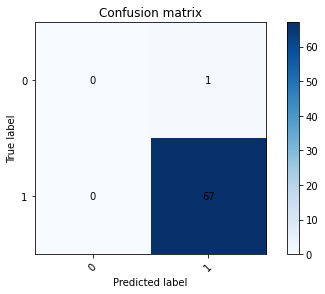

In [294]:
from sklearn.metrics import confusion_matrix

model_name = Log_Reg_tvec

# Generate predictions
y_pred = (model_name.predict(X_test['new_tweet'])) 
y_test.shape
y_pred.shape

# Calculate ROC AUC and Accuracy scores
#print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")

# # Plot confusion matrix
plt.figure()
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1']);

In [295]:
#export final tvec and gb model using pickle
import pickle
filename = './logit_model.sav'
pickle.dump(Log_Reg_tvec , open(filename, 'wb'))